**[<font size=6>Jakarta travel time prediction Competition</font>](https://contest.yandex.com/contest/74775)** [**rules**](https://disk.yandex.com/d/7xJ8GeGacA5KbA) for task.

<font color=green><h3><b>**Task description**</b><font>

**Predictive Regression Modeling**: predict the duration of a car trip based on the features of a route in Jakarta. The available features include the start and end points, weather conditions, road traffic, and others.


The dataset is divided into the training and test subsets (with no target values for the objects — you need to predict those). Your target variable is the travel time 'travel_time', a numerical feature. You need to predict it in the test dataset.






<font color=green><h3><b>**About Data**</b><font>

<font color=green><h5><b> Dataset Overview</b><font>

The dataset contains information on various trips across the city of Jakarta. There is no real-world data in the dataset.

<font color=green><h5><b>Column Descriptors</b><font><font color=green>

1. **start_point, end_point**: Districts of Jakarta from which and to which the trip is being made (for example, Central Jakarta → North Jakarta).
2. **time_of_day**: Time of the day.
3. **day_of_week**: Day of the week.
4. **traffic_condition**: Traffic conditions during the trip (congestions etc.).
5. **event_count**: Number of events occurring near the route.
6. **is_holiday**: Whether the trip takes place on the same day as a public holiday.
7. **weather**: Weather conditions on the day of the trip.
8. **population_density**: Population density in the districts along the route.
9. **vehicle_density**: Vehicle density in the districts along the route.
10. **public_transport_availability**: Availability of public transport along the route.
11. **historical_delay_factor**: Total travel delay on the day of the trip.
12. **travel_time**: Actual travel time (**target**).

<font color=green><h3><b>About the solution and the baseline
</b><font>


You can solve the task using the pipeline we’ve studied in the course. You need to apply the preprocessing and target prediction methods from the regression task module. To help you approach the task, we’ll highlight the problems in the dataset and the starting points for your experiments.

Pay special attention to data handling and preprocessing, as well as exploratory data analysis (EDA). We also suggest that you look into other linear and non-linear regression prediction algorithms.


<font color=green><h3><b>Competition's Rules

You can find about rules and evaluation your solution [here](https://disk.yandex.com/d/7xJ8GeGacA5KbA).



<font color=green><h3><b> **Solution format**</b><font>


It is needed to provide two files:
Submission-file to be uploaded to the Yandex Contest system As a solution and Notebook-file to be sent via email by request from the Organiser after the competition ended up.


Notebook-file. This is an IPYNB-file that contains the code for preparing the Submission-file. The preparation code consists of importing and preparing data, training the model, and preparing the file itself with responses for the test sample. This includes predicting the target/responses for the test sample. The notebook-file will be needed to check reproducibility (Rules, clause 6.2.4.).




<font color=green><h3><b> **Evaluation your solution at Yandex Competition**</b><font>


To evaluate your solution, we’ll use the [$R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination) metric on the test sample (test_sample.csv). The column with the true target variable has been deleted in the file. Your task is to predict the target variable value for each object, fill in the submission file, and send it to the Yandex Contest for evaluation.

Make sure that the order of objects in the submission file is the same as in the test dataset test_sample.csv — otherwise, we won’t be able to evaluate your solution. See below for instructions on how to prepare the submission file. Your need to fill in the submission.csv file with predicted values of the target regression variable for each object in the test dataset (that is, the predicted travel time for each trip).

The Yandex Contest system will calculate the prediction error and return your model’s error rate on the test dataset. Your score will appear on the leaderboard, ranked against the other contestants. For more information how Yandex Contest evaluates your solutions, see instructions below.

<font color=green><h3><b>**Preparing the submission file**</b><font>

Use the code from this notebook to prepare your submission file. Make sure that the order of objects in the submission file is the same as in the test dataset, and that there is only not-indexed one column with responses from your model. You’ll find the preparation code below the baseline solution. Click [here](https://www.kaggle.com/code/sgwood/step-1-understanding-the-submission-file). for more information about the submission file.


<font color=green><h3><b>**More about uploading the file and LeaderBoard the Yandex Contest**</b><font>




To send a submission file, open the [competition](https://contest.yandex.com/contest/74775/enter/), go to Problems, select the task "Jakarta Travel Time Prediction", choose a file from your local storage, and submit it by clicking Send File. This is also where you can check how many attempts you have left to solve the competition tasks.


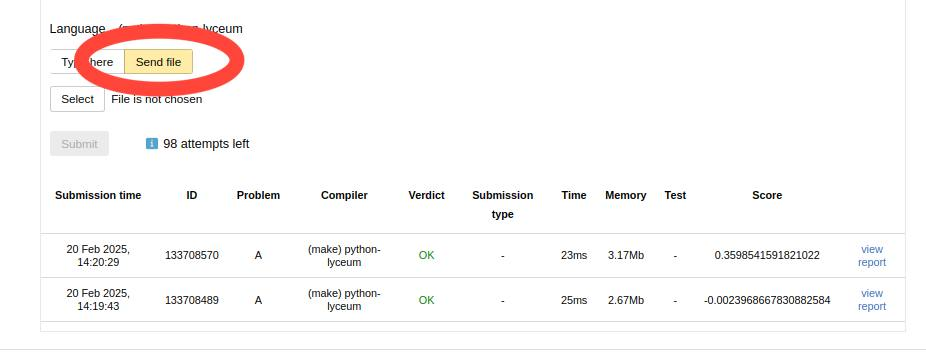



If your submission is prepared correctly (see the instructions above, use the baseline approach), the system returns the "OK" verdict. In addition, the system gives your submission a score based on the $R^2$ value for the test sample.

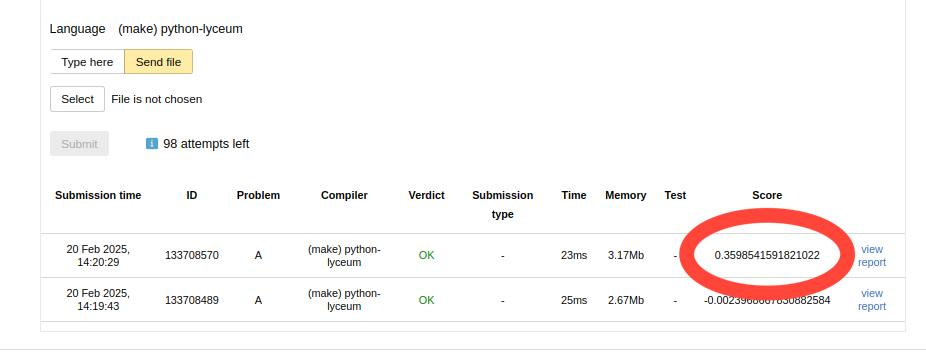

After submission, your score appears on the general leaderboard, visible to both you and other participants. Rankings are based on score, which serves as the main competition metric. The leaderboard displays your highest-scoring submission. The score shown in the leaderboard monitor table updates only when your best result improves.

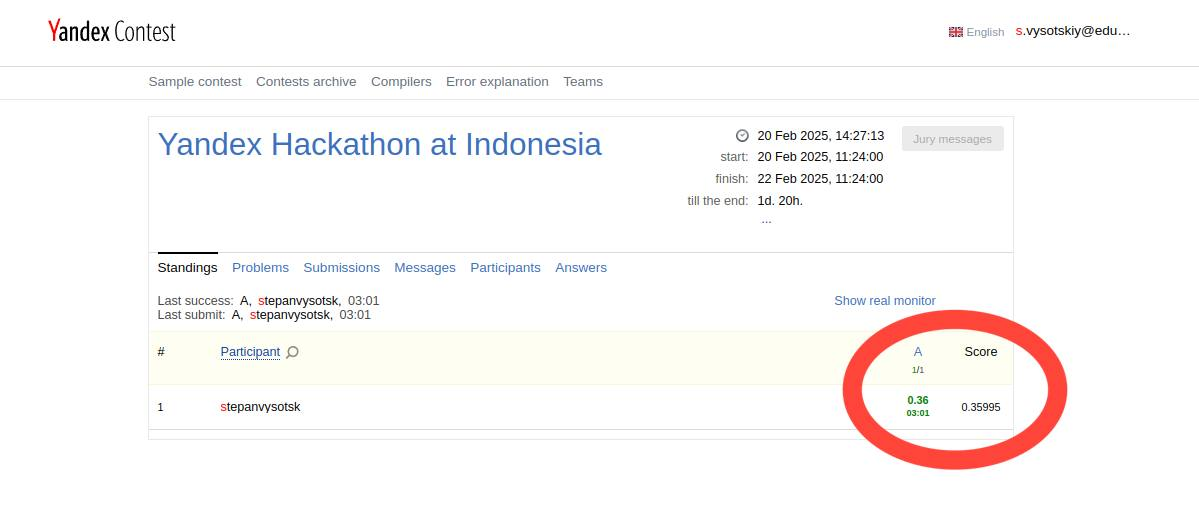

<font color=green><h3><b>**Your works**</b><font>

Your code.

In [24]:
!pip install catboost
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"  # allows multiple prints from a cell

# install all packages and dependencies so that the code cell runs without errors.

import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os, plotly.express as px, xgboost as xgb, lightgbm, re, tensorflow as tf, tensorflow.keras as keras
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import sklearn.preprocessing # trasnformers
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.neural_network import MLPRegressor  # SKLearn's MLP is optimised for CPU (and doesn't use GPU)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score
# other imports or implementation (for example, Robust Regressor with interpretable match-case statements)
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
import joblib

np.set_printoptions(linewidth=10000, precision=2, edgeitems=20, suppress=True)
pd.set_option('display.max_colwidth', 100, 'display.max_columns', 10, 'display.width', 1000, 'display.max_rows', 8)

In [25]:
train_sample = pd.read_csv('train_sample.csv')
train_sample

,start_point,end_point,time_of_day,day_of_week,traffic_condition,...,population_density,weather,public_transport_availability,historical_delay_factor,travel_time
0,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),day,Sunday,NaN,...,high,NaN,1,0.878909,26.907612
1,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),morning,Thursday,NaN,...,high,NaN,1,1.081668,27.489129
2,Central Jakarta (Jakarta Pusat),East Jakarta (Jakarta Timur),morning,Thursday,NaN,...,low,NaN,2,1.192379,27.228978
3,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),morning,Friday,10.0,...,high,fog,1,0.833348,33.943970
...,...,...,...,...,...,...,...,...,...,...,...
39996,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),morning,Friday,9.0,...,NaN,fog,1,0.914077,55.668274
39997,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),evening,Friday,5.0,...,low,fog,1,0.943298,60.548584
39998,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),day,Thursday,10.0,...,NaN,rain,1,1.185288,23.996753
39999,South Jakarta (Jakarta Selatan),East Jakarta (Jakarta Timur),night,Saturday,NaN,...,NaN,rain,2,0.873630,13.841914


In [26]:
test_sample = pd.read_csv('test_sample.csv')
test_sample

,start_point,end_point,time_of_day,day_of_week,traffic_condition,...,vehicle_density,population_density,weather,public_transport_availability,historical_delay_factor
0,West Jakarta (Jakarta Barat),East Jakarta (Jakarta Timur),morning,Saturday,5.0,...,medium,NaN,NaN,2,1.126429
1,South Jakarta (Jakarta Selatan),East Jakarta (Jakarta Timur),evening,Saturday,NaN,...,low,medium,fog,2,1.121015
2,Central Jakarta (Jakarta Pusat),South Jakarta (Jakarta Selatan),morning,Friday,9.0,...,high,NaN,rain,1,1.109638
3,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),night,Wednesday,5.0,...,low,NaN,storm,1,0.842474
...,...,...,...,...,...,...,...,...,...,...,...
2996,Central Jakarta (Jakarta Pusat),East Jakarta (Jakarta Timur),day,Monday,NaN,...,high,medium,NaN,2,0.941115
2997,South Jakarta (Jakarta Selatan),East Jakarta (Jakarta Timur),day,Saturday,5.0,...,medium,high,fog,2,0.973585
2998,North Jakarta (Jakarta Utara),West Jakarta (Jakarta Barat),day,Tuesday,NaN,...,low,medium,clear,0,0.815122
2999,North Jakarta (Jakarta Utara),West Jakarta (Jakarta Barat),night,Friday,9.0,...,NaN,high,rain,0,0.873886


<font color=green><h3><b>$\alpha$. Preprocessing and EDA</b><h3>

Note there are many omissions, duplicates, outliers, and non-informative features in the dataset, so you need to improve its quality for model training. Below, we highlight some of the problems in the data that may degrade the model quality.</font>

<font color=green>Use graphs to explore the data in detail and find relationships that you can later incorporate into the model. Let’s plot a couple of graphs that may be useful for further model building.</font>


In [27]:
# fill_mode = lambda col: col.fillna(col.mode())
# train_sample = train_sample.fillna({k: v[0] for k, v in train_sample.mode().to_dict().items()})
# test_sample = test_sample.fillna({k: v[0] for k, v in train_sample.mode().to_dict().items()})

missing_count=train_sample.isnull().sum()
for i in range(missing_count.size):
  print(missing_count[i])

0
0
0
0
14401
0
0
14378
14448
14429
0
0
0


/tmp/ipython-input-27-4180134864.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(missing_count[i])


In [ ]:
y_train = train_sample['travel_time']
X_train = train_sample.drop('travel_time', axis=1)
X_test = test_sample
# etc.

# log y_train
y_train_log=np.log1p(y_train)

# combine columns
X_train['route']=X_train['start_point']+' -> '+X_train['end_point']
X_train=X_train.drop(columns=['start_point', 'end_point'])
X_test['route']=X_test['start_point']+' -> '+X_test['end_point']
X_test=X_test.drop(columns=['start_point', 'end_point'])

# X_train['is_no_work_day']=((X_train['is_holiday']==1)|(X_train['day_of_week'].isin(['Saturday', 'Sunday']))).astype(int)
# X_test['is_no_work_day']=((X_test['is_holiday']==1)|(X_test['day_of_week'].isin(['Saturday', 'Sunday']))).astype(int)

# X_train['moment']=X_train['day_of_week']+'-'+X_train['time_of_day']
# X_train=X_train.drop(columns=['day_of_week', 'time_of_day'])
# X_test['moment']=X_test['day_of_week']+'-'+X_test['time_of_day']
# X_test=X_test.drop(columns=['day_of_week', 'time_of_day'])

# missing values
missing_numerical_cols=['traffic_condition', 'event_count', 'historical_delay_factor']
missing_categorical_cols=['weather', 'vehicle_density', 'population_density']

# replace missing numerical with median
median_vals={col:X_train[col].median() for col in missing_numerical_cols}
X_train[missing_numerical_cols]=X_train[missing_numerical_cols].fillna(value=median_vals)
X_test[missing_numerical_cols]=X_test[missing_numerical_cols].fillna(value=median_vals)

# replace missing categorical with mode
mode_vals={col:X_train[col].mode()[0] for col in missing_categorical_cols}
X_train[missing_categorical_cols]=X_train[missing_categorical_cols].fillna(value=mode_vals)
X_test[missing_categorical_cols]=X_test[missing_categorical_cols].fillna(value=mode_vals)

# combine columns pt 2
# X_train['vehicle_per_pop']=X_train['vehicle_density']+'-'+X_train['population_density']
# X_train=X_train.drop(columns=['vehicle_density', 'population_density'])
# X_test['vehicle_per_pop']=X_test['vehicle_density']+'-'+X_test['population_density']
# X_test=X_test.drop(columns=['vehicle_density', 'population_density'])

# enumerate weather
# temp_df=pd.concat([X_train, y_train], axis=1)
# weather_enum=temp_df.groupby('weather')['travel_time'].mean().sort_values()
# weather_enum_map={weather: rank for rank, weather in enumerate(weather_enum.index)}
# X_train['weather_enum']=X_train['weather'].map(weather_enum_map)
# X_train.drop(columns=['weather'])
# X_test['weather_enum']=X_test['weather'].map(weather_enum_map)
# X_test.drop(columns=['weather'])

# one-hot encode categorical data, handle outlier then Min-Max scale numerical
numerical_cols=['traffic_condition', 'event_count', 'is_holiday', 'public_transport_availability', 'historical_delay_factor']
categorical_cols=['route', 'day_of_week', 'time_of_day', 'vehicle_density', 'population_density', 'weather']
# categorical_cols=['route', 'day_of_week', 'time_of_day', 'vehicle_per_pop', 'weather', 'is_no_work_day', 'weather']
encoder=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler=MinMaxScaler()

encoder.fit(X_train[categorical_cols])
X_train_encoded=encoder.transform(X_train[categorical_cols])
X_test_encoded=encoder.transform(X_test[categorical_cols])
feature_names=encoder.get_feature_names_out(categorical_cols)
X_train_encoded=pd.DataFrame(X_train_encoded, index=X_train.index, columns=feature_names)
X_test_encoded=pd.DataFrame(X_test_encoded, index=X_test.index, columns=feature_names)


# outliers in numerical columns
# lower_quantile=0.01
# upper_quantile=0.99
# for col in numerical_cols:
#   lower_bound=X_train[col].quantile(lower_quantile)
#   upper_bound=X_train[col].quantile(upper_quantile)
#   X_train[col]=X_train[col].clip(lower=lower_bound, upper=upper_bound)

#   lower_bound=X_test[col].quantile(lower_quantile)
#   upper_bound=X_test[col].quantile(upper_quantile)
#   X_test[col]=X_test[col].clip(lower=lower_bound, upper=upper_bound)

X_train_scaled=scaler.fit_transform(X_train[numerical_cols])
X_test_scaled=scaler.fit_transform(X_test[numerical_cols])
X_train_scaled=pd.DataFrame(X_train_scaled, index=X_train.index, columns=numerical_cols)
X_test_scaled=pd.DataFrame(X_test_scaled, index=X_test.index, columns=numerical_cols)

X_train_processed=pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_processed=pd.concat([X_test_scaled, X_test_encoded], axis=1)

# check results for missing values & correct columns
print(X_test_processed.columns.all()==X_train_processed.columns.all())
print((X_train_processed.isna().all() | X_train_processed.isnull().all()).all())
print((X_test_processed.isna().all() | X_test_processed.isnull().all()).all())
print(X_train_processed.columns)

# several preprocessing steps are skipped since they do not generate a better R2 score with the testing dataset.

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

True
False
False
Index(['traffic_condition', 'event_count', 'is_holiday', 'public_transport_availability', 'historical_delay_factor', 'route_Central Jakarta (Jakarta Pusat) -> East Jakarta (Jakarta Timur)', 'route_Central Jakarta (Jakarta Pusat) -> North Jakarta (Jakarta Utara)', 'route_Central Jakarta (Jakarta Pusat) -> South Jakarta (Jakarta Selatan)', 'route_Central Jakarta (Jakarta Pusat) -> West Jakarta (Jakarta Barat)', 'route_North Jakarta (Jakarta Utara) -> East Jakarta (Jakarta Timur)', 'route_North Jakarta (Jakarta Utara) -> South Jakarta (Jakarta Selatan)', 'route_North Jakarta (Jakarta Utara) -> West Jakarta (Jakarta Barat)', 'route_South Jakarta (Jakarta Selatan) -> East Jakarta (Jakarta Timur)', 'route_West Jakarta (Jakarta Barat) -> East Jakarta (Jakarta Timur)', 'route_West Jakarta (Jakarta Barat) -> South Jakarta (Jakarta Selatan)', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
 

<font color=green><H3><b>$\gamma$. Model: fitting regressor </b></H2>
</font>

<font color=green> Now let’s train a CatBoostRegressor model on the data. You can find more about the CatBoost model by Yandex [here](https://catboost.ai/).
</font>

<font color=gray> [Participant's Note] Additional instruction from organizer: Participants are only allowed to use one Linear Regression model (i.e. `LinearRegression`, `Ridge`, `Lasso`, `ElasticNet`, `SGDRegressor` from `sklearn.linear_model`). No pipelining allowed.
</font>




In [ ]:
# models: LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
# want lower mse, higher r2

# model = LinearRegression()
# model = Ridge(fit_intercept=False, alpha=1.0, random_state=42)
# model = Lasso(fit_intercept=False, alpha=1.0, random_state=42)
# model = ElasticNet(fit_intercept=False, random_state=42)

model = SGDRegressor(alpha=0.0000001, eta0=0.068, power_t=0.249, penalty=None, early_stopping=True, n_iter_no_change=28, random_state=42)

model.fit(X_train_processed, y_train_log)

SGDRegressor(alpha=1e-07, early_stopping=True, eta0=0.068, n_iter_no_change=28,
             penalty=None, power_t=0.249, random_state=42)

<font color=green><H3><b>$\delta$. Model: evaluation and submit</b></H2>
</font>

<font color=green> Evaluate the model using a selected metric (for example, MSE). Fill in the submission.csv file with the prediction data generated by the model and submit it to the LMS.</font>

In [30]:
y_train_hat_log = model.predict(X_train_processed)
y_train_hat=np.expm1(y_train_hat_log)
mse_lr = mse(y_train_hat, y_train)
r2_lr = r2_score(y_train_hat, y_train)
mse_lr, r2_lr
# also: RMSE will estimate the error on the dataset in the original units

(21.042360725800542, 0.9008043667275291)

In [31]:
# your code here

In [32]:
# submission
y_hat_test_log = model.predict(X_test_processed)
y_hat_test=np.expm1(y_hat_test_log)
pd.DataFrame(y_hat_test).to_csv('submission.csv', index=False) # save csv-file to root/submission.csv

In [33]:
# attention! check, this code cell should run without errors
pd.read_csv('submission.csv')['0']

,0
0,50.994081
1,19.549612
2,24.092635
3,20.674438
...,...
2996,24.658561
2997,16.220275
2998,15.400281
2999,16.716685


In [34]:
# also: example of preparing zeros submission
# this file preparation is identical to the preparation described above:

# y_hat_test = np.zeros(y_hat_test.shape)
# pd.DataFrame(y_hat_test).to_csv('submission.csv', index=False)

<font color=green>Send the submission file to the LMS.<font color=green>

<font color=green><h3><b>$\epsilon$. References:</b></h3></font>

<font color=green> Remember to cite your sources here! List resources that helped you with ideas and code ([articles/books](https://scholar.google.com/), StackOverflow, Wikipedia, etc.)

<font color=green><b>Student's answer:</b></font>

1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

</font>

<font color=green><h3><b>$\zeta$. Documentation: Explain decisions in your process</b></h3></font>

<font color=green><h4><b>Task 1. Explain Decisions in Preprocessing Pipeline</b></h4></font>

<font color=green>
Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.</font>

<font color=green>

1. Why did you choose these elements? (Something in EDA, prior experience,...? Note: EDA is not required)
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

</font>


<font color=green><b>Student's answer:</b></font>

1. I chose to combine start_point and end_point columns since it lets the model see the "distance" of the travel. Since there are not many route variations, I simply added the two features together to create the feature "route". I then deleted the "start_point" and "end_point" columns to avoid redundancy and simplify the model.<br>
I replaced missing numerical values with the median to avoid being affected by outliers and used a MinMax scaler to help the model find the solution faster.
I replaced missing categorical values with the mode since I cannot use mean or median and used One Hot Encoding to maintain the relationship among categories that the model can process.<br>
I also used a log transformation to "y_train" to make the relationship more linear.
2. I compared the MSE and R2 score with and without the change. The MSE and R2 score becomes better with the change.
3. I tried:
- combining "is_holiday" with weekends in "day_of_week"
- combining "day_of_week" and "time_of_day"
- combining "vehicles_per_population" and "population_density"
- removing outliers (lower and upper 1% of numerical data)
<br> but these all made the MSE and R2 score worse, so I commented them out.

<font color=green><h4><b>Task 2. Explain Decisions in Modeling Pipeline</b></h4></font>

<font color=green>
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful.

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

</font>

<font color=green><b>Student's answer:</b></font>

1. I set the random state to allow reproducibility.<br>
To prevent the model from overfitting, I set the early stopping to true, and n_iter_no_change to 28 from trial and error.<br>
I also decided on the values for alpha, eta0, power_t, and penalty by trial and error.
2. I checked the effectiveness by referring to the MSE and R2 score from the training dataset, and the R2 score of the testing dataset in the Hackathon platform.
3. I tried all the 5 linear regression models. But by reading the documentation, I chose to use SGDRegressor in the end, since SGDRegressor can be modified to work similarly as the other 4 models.

# 💡**Starter Ideas**

1. **Preproccesing**: thoroughly preprocess the data, removing duplicates and filling in the omissions with more complex rules (for example, use the mode for each feature).
2. **EDA**: explore the distribution of the object features, remove outliers, and carefully examine the target variable. Exploratory data analysis may yield more important insights than any machine learning model, because your findings have will have one invaluable quality — interpretability. You may want take a closer look at the discrete distributions of categorical features, as well as the number of unique feature values and how informative the variable is. Examine shifts in variable values, including in different datasets (training and test).
2. **Robust algorithms and interpretability**: Check the test dataset for shifts and the retention of dependencies learned by the model. To assess the model’s representativeness, use a holdout dataset. You might want to train more robust models that will deliver high quality regardless of dataset shifts. For example, you may try to thoroughly analyze the data and describe the target variable with decision algorithms (match-case statement, if-else).
3. **Hypotheses**: We recommend formulating your own hypotheses regarding the factors that influence the travel time. For example, you may use the data to derive the lower estimate for the trip duration that captures most of the true dependencies.
4. **Data**: The use of additional data for solving the problem is allowed if this helps to understand the nature of the data provided. One example of useful features may include data on districts and routes in Jakarta.
3. **Tuning model, validation set**: for the final stage, a model is usually evaluated on a validation set rather than on a training dataset. A part of the training dataset is put aside for the validation set, and the model is trained on the remaining data. Validation sets are also useful for tuning hyperparameters (for example, using cross-validation) for optimal model performance.
4. **Other linear (and non-linear) models**: Try out different approaches to linear models (Ridge, Lasso, SGDRegressor, MLPRegressor).
8. **Ensemble**: Use ensemble learning and apply various averaging methods (Voting Classifier, Bagging, Boosting).


<font color=gray> [Participant's Note] </font>

<font color=gray>
Original hack_notebook.ipynb Notebook by DTS Yandex Competition 2025 Organisers. </font>

<font color=gray>
Solution written by Stella Ling Raharjo (https://github.com/lalaiing)
</font>